In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 支持向量机

支持向量机（SVM）是个非常强大并且有多种功能的机器学习模型，能够做 __线性__ 或者 __非线性__ 的 __分类__ ， __回归__ ，甚至 __异常值检测__。

SVM	__特别适合__ 应用于 __复杂__ 但 __中小规模数据集__ 的 __分类__ 问题。


### 硬/软间隔分类

* __硬间隔分类__ 有两个问题：
 
  __严格地规定__ 所有的数据都不在“街道”上，都在正确地两边，称为硬间隔分类
 
  1、只对线性可分的数据起作用。
  
  2、对异常点敏感
  
  
* __软间隔分类__

 保持“街道”__尽可能__ 大和避免间隔违规，__找到一个良好的平衡__ 。

   为了避免上述的问题，我们更倾向于使用更加软性的模型


* __软/硬间隔分类区别__
 
 可以明显看出，对于 __硬间隔分类__ 对于最大间隔分类要求更严格，即数据不能存在在最大间隔分类的街道中，而 __软间隔__ 只是尽可能避免。

#### 提示：
 
在 __Scikit-Learn__ 库的 __SVM 类__ ，你可以用 __C 超参数__ （惩罚系数）来控制这种平衡：__较小的 C__ 会导致 __更宽__ 的“街道”，但 __更多__ 的 __间隔违规__ 。

#### 过拟合

如果你的 __SVM__ 模型 __过拟合__ ，你可以尝试通过 __减小超参数C__ 去调整。

### 注意：

SVM	对特征缩放比较敏感，所以需要进行 __特征缩放__ 。

#### 使用SVM分割iris数据集

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
x_train_iris,x_test_iris,y_train_iris,y_test_iris = train_test_split(iris.data,iris.target,test_size=0.2)

In [17]:
X = x_train_iris[:,[2,3]]
y = y_train_iris
x_test = x_test_iris[:,[2,3]]
y_test = y_test_iris

#### LinearSVC

__LinearSVC__	要使 __偏置项规范化__ ，首先你应该 __集中训练集__ 减去它的 __平均数__ 。如果你使用 了 __StandardScaler__ ，那么它会 __自动处理__ 。此外，确保你设置 __loss	参数__ 为	__hinge__	，因为它不是 __默认值__ 。

最后，为了得到更好的效果，你需要将 __dual__ 参数设置为 __False__	，除非 __特征数__ 比 __样本量__ 多。

__loss='hinge'__  可以实现一个 __软间隔的SVM__ ,但是因为不是默认损失函数，所以需要自己指定

In [7]:
svm_clf = Pipeline((
    ('StandardScaler',StandardScaler()),
    ('line_svc',LinearSVC(C=1,loss='hinge',max_iter=1000,dual=True))
))

svm_clf.fit(X,y)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('line_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_clf_predict = svm_clf.predict(x_test)

Extend:

In [23]:
ss = StandardScaler()
X_s = ss.fit_transform(X)
x_test_s= ss.fit_transform(x_test)

In [24]:
line_svm = LinearSVC(C=1,loss='hinge',max_iter=1000,dual=True)

In [25]:
line_svm.fit(X_s,y)

LinearSVC(C=1, loss='hinge')

In [26]:
X_s.shape

(120, 2)

In [27]:
print('w = ',line_svm.coef_)
print('b = ',line_svm.intercept_)

w =  [[-1.36872904 -0.83341984]
 [ 0.14791698 -0.1271916 ]
 [ 1.75314461  2.26155229]]
b =  [-1.31360461 -0.97834678 -2.60574843]


In [12]:
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

In [13]:
from sklearn.svm import SVC
clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y) 
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]


#### 绘制决策边界

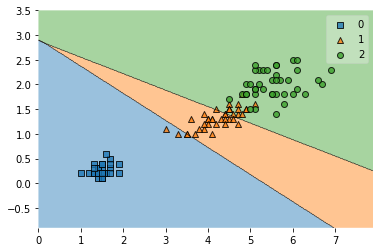

In [9]:
plot_decision_regions(X,y,clf=svm_clf)

#### 交叉验证

In [10]:
from sklearn.model_selection import cross_validate,cross_val_score

In [11]:
scores = cross_validate(svm_clf,X,y,cv=10,scoring='neg_mean_squared_error',return_train_score=True)

D:\python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
scores['train_score'].mean()

-0.13796518588381743

In [13]:
scores['test_score'].mean()

-0.15856643356643357

### 通过随机梯度下降训练 线性SVM分类器

__sklearn.svm 中的 SVC__ : 你可以在 SVC 类，使用 SVC(kernel="linear", C=1)	，但是它比较 __慢__ ，尤其在较大的训练集上，所以一般不被推荐。

#### SGDClassifier

另一个选择是使用 __SGDClassifier__ 类， 即	__SGDClassifier(loss="hinge",alpha=1/(m\*C))__	。它应用了 __随机梯度下降__ （SGD）来训练一个 __线性 SVM 分类器__ 。尽管它不会和 __LinearSVC__ 一样 __快速收敛__ ，但是对于处理那些 __不适合__ 放在 __内存__ 的 __大数据集__ 是非常有用的，或者处理 __在线分类任务__ 同样有用。

确保你设置 __loss 参数为 hinge__ ，因为它不是 __默认值__。

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgd_clf = Pipeline((
    
    ('scaler',StandardScaler()),
    ('SGD',SGDClassifier(loss='hinge'))
    
))
sgd_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SGD',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

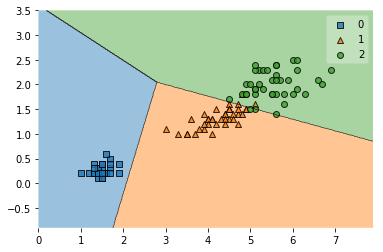

In [16]:
plot_decision_regions(X,y,clf=sgd_clf)

### 非线性SVM

一种处理 __非线性数据集__ 方法是 __增加更多的特征__ ，例如 __多项式特征__。

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

In [87]:
X, y = make_moons()

In [19]:
polynomial_svm_clf = Pipeline((
    ('polynomialfeature',PolynomialFeatures(degree=3,include_bias=False)),
    ('scaler',StandardScaler()),
    ('line_svm_clf',LinearSVC(loss='hinge',C=10))
)) 

polynomial_svm_clf.fit(X,y)

D:\python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('polynomialfeature',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('line_svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

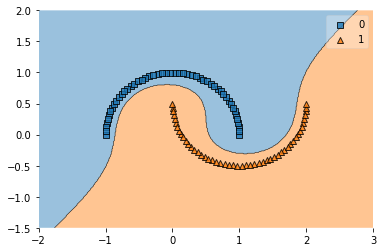

In [20]:
plot_decision_regions(X,y,clf=polynomial_svm_clf)

### 交叉验证

In [21]:
scores = cross_validate(polynomial_svm_clf,X,y,cv=3)

D:\python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


分数为1

In [22]:
scores['test_score'].mean()

1.0

### 多项式核

我们知道 __多项式__ 对分类的效果会有提升，但是低次数的多项式不能用于处理非常复杂的数据集，但是 __高次数的多项式却会产生大量的特征__ ，这会使模型变得慢。

幸运的是，我们可以通过使用 __SVM的核技巧 ，它就像是你添加了许多多项式__ ，甚至有高次数的多项式，一样好的结果。所以 __不会产生大量的特征__ 导致的特征组合爆炸， __因为你并没有添加任何特征__ 。这个技巧可以使用 __SVC__ 来实现。



### 多项式SVM

如果你的模型过拟合，你可以减小多项式核的阶数。相反的，如果是欠拟合，你可以尝试增大它。

超参数	__coef0__	控制了 __高阶多项式__ 与 __低阶多项式__ 对模型的影响。

In [23]:
from sklearn.svm import SVC

In [24]:
poly_kernel_svm_clf = Pipeline((
    ('scaler',StandardScaler()),
    ('SVC_clf',SVC(degree=10,kernel='poly',C=5,coef0=1))
))

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

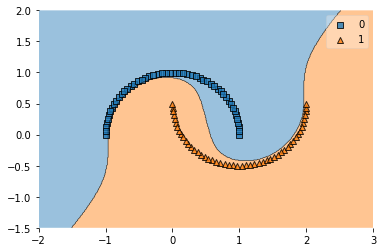

In [25]:
plot_decision_regions(X,y,clf=poly_kernel_svm_clf)

通用的方法是用网格搜索去找到 __最优超参数__ 。 __首先__ 进行非常 __粗略__ 的网格搜索一般会很快，然后在找到的 __最佳值__ 进行 __更细__ 的网格搜索。

对每个超参数的作用有一个很好的理解可以帮助你在正确的超参数空间找到合适的值。


#### 增加相似特征

另一种解决非线性问题的方法是使用 __相似函数__ （similarity	funtion）计算每个样本与特定地标 （landmark）的相似度


### 高斯	RBF	核  -  (高斯径向基核函数)

就像多项式特征法一样，相似特征法对各种机器学习算法同样也有不错的表现。但是在所有额外特征上的计算成本可能很高，特别是在大规模的训练集上。

然而，“核” 技巧再一次显现了它在 SVM 上的神奇之处： __高斯核让你可以获得同样好的结果成为可能，就像你在相似特征法添加了许多相似特征一样，但事实上，你并不需要在RBF添加它们__ 。

核函数的本质是两个函数的內积，通过核函数将其隐射到高维空间，在高维空间非线性问题转化为线性问题, SVM得到超平面是高维空间的线性分类平面

#### SVC参数说明：

超参数	__gamma(γ)__ 和 __C__ 训练的模型。

*    __参数：gamma__:

    增大 __γ__ 使钟型曲线更 __窄__ ，导致每个样本的影响范围变得更 __小__ ：即判定边界最终变得更 __不规则__ ，在单个样本周围环绕。

    相反的， __较小的 γ 值__ 使钟型曲线更 __宽__ ，样本有更大的影响范围，判定边界最终则更加 __平滑__ 。


*    __参数：C__:

    同时我们可以发现参数 __C__ 对决策边界的影响。较小的 C 会造成更宽的街道，更多的违规。

<div align=center><img  width="700" height="500" src="1.jpg"/></div>



#### 过/欠拟合
所以γ是可调整的 __超参数__ ：如果你的模型 __过拟合__ ，你应该 __减小 γ 值__ ，若 __欠拟合__ ，则 __增大 γ__ （与超参数 C	相似）。



In [26]:
rbf_kernel_svm_clf = Pipeline((
    ('Scaler',StandardScaler()),
    ('rbf_kernel_clf',SVC(kernel='rbf',gamma=0.1,C=0.001))
))

rbf_kernel_svm_clf.fit(X,y)

rbf_kernel_svm_clf2 = Pipeline((
    ('Scaler',StandardScaler()),
    ('rbf_kernel_clf',SVC(kernel='rbf',gamma=5,C=0.001))
))

rbf_kernel_svm_clf2.fit(X,y)

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rbf_kernel_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

__gamma为0.1 和 5 之间的区别,gamma越小，判断边界的曲线越平滑。__

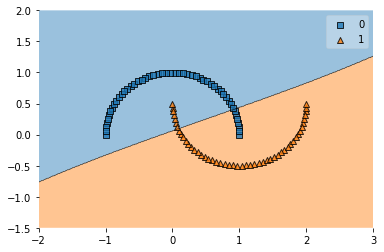

In [27]:
plot_decision_regions(X,y,rbf_kernel_svm_clf)

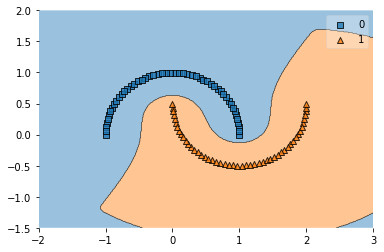

In [28]:
plot_decision_regions(X,y,rbf_kernel_svm_clf2)

### 计算复杂性

#### LinearSVC

* __LinearSVC 类__ 基于 __liblinear 库__ ，它实现了 __线性 SVM	的优化算法__ 它并 __不支持核技巧__ 。

  但是 它样本和特征的数量几乎是线性的：__训练时间复杂度__ 大约为	O(m	×	n)	。


* 如果你要非常高的精度，这个算法需要花费更多时间。这是由__容差值超参数	ϵ__ （在Scikitlearn	称为 tol ）控制的。大多数分类任务中，使用默认容差值的效果是已经可以满足一般要求。

#### SVC	

* __SVC 类__ 基于 __libsvm	库__ ，它实现了 __支持核技巧__ 的算法。
  
  __训练时间复杂度__ 通常介于O(m^2 × n)	和 O(m^3	× n)之间。不幸的是，这意味着当训练样本变大时，它将变得极其慢（例如，成千上万个样本）。


* 这个算法 __对于复杂但小型或中等数量的数据集表现是完美的__ 。然而，它能对 __特征数量__ 很好的缩放，尤其对 __稀疏特征__ 来说(__即每个样 本都有一些非零特征__)。


### 小结

__多项式__ 或者 __相似函数__ 在大数据集上计算的成本都比较高，一个合适的方案是使用 __核函数(高斯核 - 最常用)__ 其他的核函数，基本上不怎么使用。

## 如何选择模型？

1、一般来说，首先我们应该先尝试 __线性核函数__ ，记住 __LinearSVM__ 比 __SVC(kernel='linear')__ 要 __快得多__ ，尤其是当 __训练集很大__ ，或者有 __大量的特征__ 的情况下。 

2、如果数据集不太大，也可以尝试使用 __高斯径向基核__ ，它在大多数情况都很有效。

## SVM	回归

SVM	算法应用广泛：不仅仅支持 __线性__ 和 __非线性__ 的 __分类任务__ ，还支持 __线性__ 和 __非线性__ 的 __回归任务__。

#### SVM回归和SVM分类做的事

* __技巧在于逆转我们的目标：__ 限制间隔违规的情况下，不是试图在两类别之间找到尽可能大的“街道”（即间隔）。


* __SVM 回归__ 任务是 __限制间隔违规情况下__ ，尽量 __放置更多的样本在“街道”上__ （“街道”的宽度由超参数 ϵ（__epsilon__） 控制 __ϵ 越大街道越宽__ ）。 


* __但是：__ 添加更多的数据样本在间隔之内并不会影响模型的预测，因此，这个模型认为是不敏感的 （ϵ-insensitive）


* __注意：__ 训练数据要进行 __中心化__ 或者 __标准化__

#### 使用	Scikit-Learn	的	LinearSVR	类去实现线性	SVM	回归

In [30]:
from sklearn.svm import LinearSVR

In [88]:
svm_reg = Pipeline((
    ('scaler',StandardScaler()),
    ('linear_svr',LinearSVR(epsilon=1.5))
))
svm_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svr',
                 LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

#### 二次方多项式核函数的	SVM	回归

In [89]:
from sklearn.svm import SVR

In [90]:
svr_reg = Pipeline((
    ('scaler',StandardScaler()),
    ('SVR',SVR(kernel='poly',degree=2,C=100,epsilon=0.1))
))
svr_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVR',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

#### SVM	也可以用来做异常值检测，详情见	Scikit-Learn	文档


## 练习：

__问：__ 1、在一个线性可分的数据集训练一个	LinearSVC	，并在同一个数据集上训练一 个	SVC	和	SGDClassifier	，看它们是否产生了大致相同效果的模型。


In [91]:
from sklearn.linear_model import SGDClassifier

In [166]:
iris = datasets.load_iris()

x = iris.data[:,1:3]
y = iris.target

In [167]:
y_index = (y <2)
x = x[y_index]
y = y[y_index]

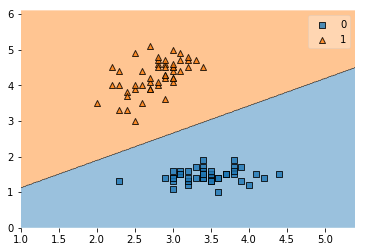

In [173]:
linear_svc = Pipeline((
    ('scaler',StandardScaler()),
    ('svc_clf',LinearSVC())
))
linear_svc.fit(x,y)
plot_decision_regions(x,y,linear_svc)

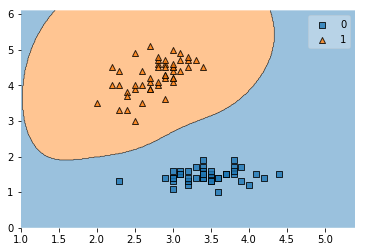

In [174]:
svc = Pipeline((
    ('scaler',StandardScaler()),
    ('svc_clf',SVC())
))
svc.fit(x,y)
plot_decision_regions(x,y,svc)

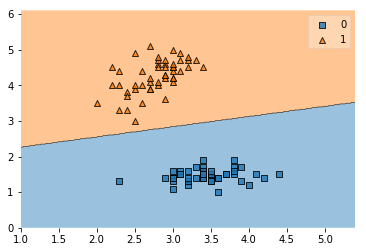

In [175]:
sgd_clf = Pipeline((
    ('scaler',StandardScaler()),
    ('svc_clf',SGDClassifier())
))
sgd_clf.fit(x,y)
plot_decision_regions(x,y,sgd_clf)

__答：__ 可以看到 __Linear_svc__ 和 __SGDClassifier__ 的决策边界很光滑，但是 __SVC__ 是非线性的，不光滑。